In [1]:
from dataset import *
from train import *

import matplotlib.pyplot as plt

import torch, torchvision
import torchvision.transforms as transforms

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
batch_size = 32


train_transform = transforms.Compose([
    transforms.Resize(256), transforms.RandomCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

val_transform = transforms.Compose([
    transforms.Resize(256), transforms.CenterCrop((224, 400)),
    transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])


train_dataset = TrainDataset(transform=train_transform)
val_dataset = ValDataset(transform=val_transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [4]:
model = Baseline(model='resnet18', num_classes=len(train_dataset.label_info), print_freq=5, save=True)

In [5]:
epochs = 5
lr = 0.0005
weight_decay = 0.00001

In [6]:
model.train(train_loader, val_loader, epochs=epochs, lr=lr, weight_decay=weight_decay)

Epoch 1 Started...
Best Model Saved
Iteration : 1 - Train Loss : 5.288238, Test Loss : 5.092276, Train Acc : 0.000000, Test Acc : 2.785326
Best Model Saved
Iteration : 6 - Train Loss : 4.567182, Test Loss : 4.983991, Train Acc : 6.250000, Test Acc : 8.288043
Best Model Saved
Iteration : 11 - Train Loss : 4.310934, Test Loss : 4.465742, Train Acc : 9.375000, Test Acc : 12.975543
Best Model Saved
Iteration : 16 - Train Loss : 4.047945, Test Loss : 3.920970, Train Acc : 18.750000, Test Acc : 22.894022
Best Model Saved
Iteration : 21 - Train Loss : 3.617756, Test Loss : 3.466633, Train Acc : 21.875000, Test Acc : 29.619565
Best Model Saved
Iteration : 26 - Train Loss : 3.227501, Test Loss : 3.102226, Train Acc : 25.000000, Test Acc : 32.880435
Best Model Saved
Iteration : 31 - Train Loss : 2.983870, Test Loss : 2.816511, Train Acc : 46.875000, Test Acc : 43.138587
Iteration : 36 - Train Loss : 2.558961, Test Loss : 2.580997, Train Acc : 46.875000, Test Acc : 42.187500
Best Model Saved
Iter

Iteration : 81 - Train Loss : 0.067255, Test Loss : 0.421823, Train Acc : 100.000000, Test Acc : 89.062500
Iteration : 86 - Train Loss : 0.069933, Test Loss : 0.273341, Train Acc : 100.000000, Test Acc : 94.089674
Iteration : 91 - Train Loss : 0.086475, Test Loss : 0.214636, Train Acc : 100.000000, Test Acc : 94.972826
Iteration : 96 - Train Loss : 0.066357, Test Loss : 0.146515, Train Acc : 100.000000, Test Acc : 97.350543
Iteration : 101 - Train Loss : 0.050252, Test Loss : 0.192615, Train Acc : 100.000000, Test Acc : 96.127717
Iteration : 106 - Train Loss : 0.178305, Test Loss : 0.184526, Train Acc : 93.750000, Test Acc : 95.040761
Iteration : 111 - Train Loss : 0.067804, Test Loss : 0.155567, Train Acc : 100.000000, Test Acc : 96.875000
Iteration : 116 - Train Loss : 0.070471, Test Loss : 0.119539, Train Acc : 100.000000, Test Acc : 97.961957
Iteration : 121 - Train Loss : 0.108796, Test Loss : 0.088884, Train Acc : 96.875000, Test Acc : 97.350543
Iteration : 126 - Train Loss : 0.0

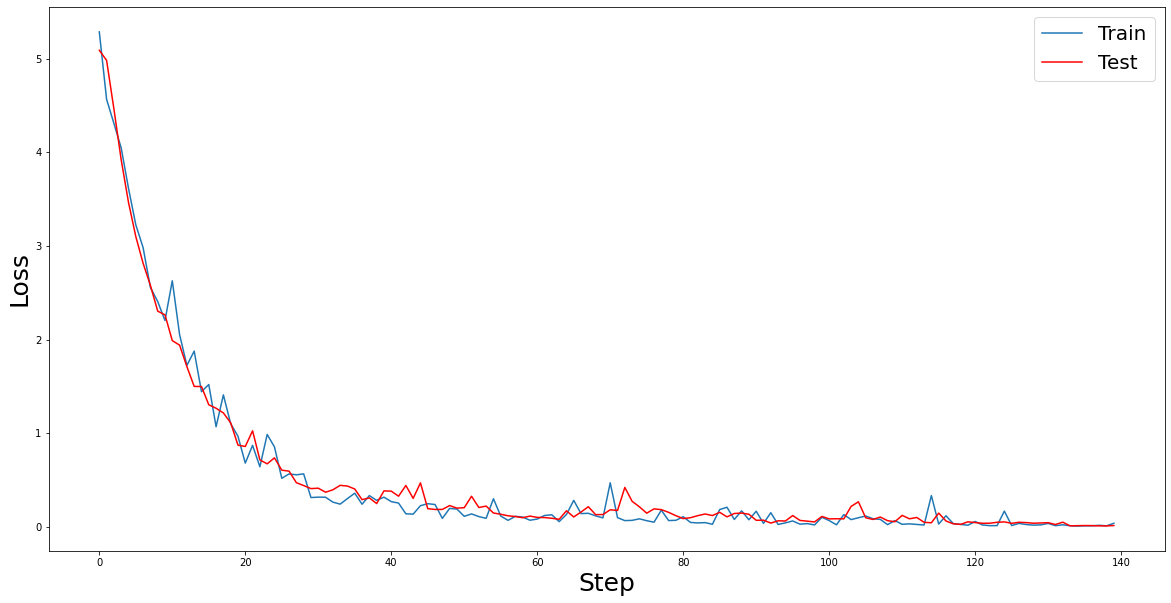

In [7]:
label_fontsize = 25

plt.figure(figsize=(20, 10))
train_lossline, = plt.plot(model.train_losses, label='Train')
test_lossline, = plt.plot(model.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.show()

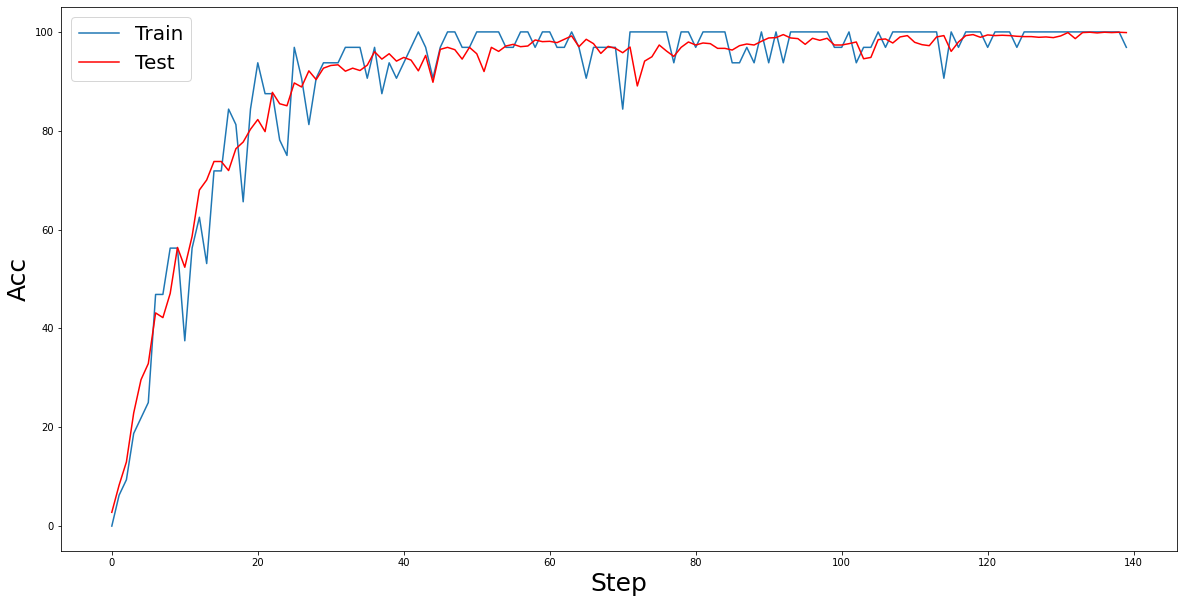

In [8]:
plt.figure(figsize=(20, 10))
train_accline, = plt.plot(model.train_acc, label='Train')
test_accline, = plt.plot(model.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Acc', fontsize=label_fontsize)
plt.show()